# Analysis of the City Dataset

We will explore some concepts of the statistical bootstrapping with basic examples.

In [1]:
using Bootstrap

In [2]:
srand(1)

## City Dataset

Let's have a look at the *city* dataset. This measured the population (in thousands of inhabitants) of major US cities in 1920 (column `U`) and 1930 (column `X`).

In [3]:
using RDatasets

In [4]:
city = dataset("boot", "city")

,U,X
1,138,143
2,93,104
3,61,69
4,179,260
5,48,75
6,37,63
7,29,50
8,23,48
9,30,111
10,2,50


We want to estimate the relative change of the population. An obvious approach for this is to compute the ratios of the average population between the two time points.

In [5]:
city_ratio(df::DataFrame) = mean(df[:,:X]) ./ mean(df[:,:U])

city_ratio (generic function with 1 method)

The point estimate yields a relative change of ~1.52. We will use different bootstrap approaches to compute confidence intervals for the point estimate.

In [6]:
city_ratio(city)

1.5203125

## Bootstrap Estimates of Relative Growth

Here, we will start with three commonly used bootstrapping techniques: The ordinary, the first-order balanced and the exact bootstrap.

In [7]:
bs1 = boot_basic(city, city_ratio, 10000)

Bootstrap Sampling
  Estimate: 1.5203
  Bias:     0.042455
  StdError: 0.22160999999999997
  Samples:  10000
  Method:   basic
  Data:     DataFrame: { 10 × 2 }


In [8]:
bs2 = boot_balanced(city, city_ratio, 10000)

Bootstrap Sampling
  Estimate: 1.5203
  Bias:     0.039737
  StdError: 0.22154
  Samples:  10000
  Method:   balanced
  Data:     DataFrame: { 10 × 2 }


In [9]:
bs3 = boot_exact(city, city_ratio)

Bootstrap Sampling
  Estimate: 1.5203
  Bias:     0.080894
  StdError: 0.37132
  Samples:  92378
  Method:   exact
  Data:     DataFrame: { 10 × 2 }


## Confidence Intervals

For the results from the balanced bootstrap, let's estimate confidence intervals for our point estimate for the relative gain.

In [10]:
ci_basic(bs2)

Bootstrap Confidence Interval
  Estimate: 1.5203
  Interval: [0.92877,1.78585]
  Level:    0.95
  Method:   basic


In [11]:
ci_normal(bs2)

Bootstrap Confidence Interval
  Estimate: 1.5203
  Interval: [1.04636,1.91479]
  Level:    0.95
  Method:   normal


In [12]:
ci_perc(bs2)

Bootstrap Confidence Interval
  Estimate: 1.5203
  Interval: [1.25478,2.11186]
  Level:    0.95
  Method:   perc


In [13]:
ci_bca(bs2)

Bootstrap Confidence Interval
  Estimate: 1.5203
  Interval: [1.24843,2.0716]
  Level:    0.95
  Method:   bca


## Visualization

Finally, we visualize the distribution of the bootstrapped estimates $t_{1}$ together with the naive estimate $t_{0}$.

In [14]:
using Gadfly

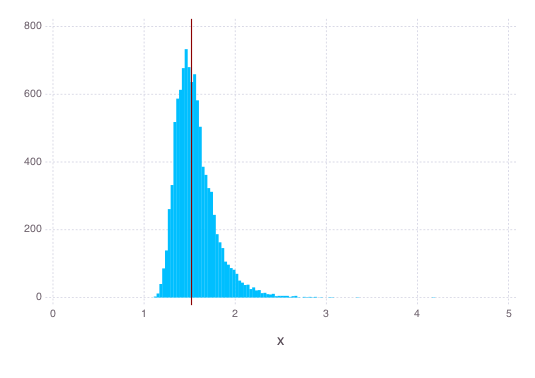

In [15]:
p = plot(
    layer(xintercept = [estimate(bs1)], Geom.vline(color = colorant"darkred")),
    layer(x = straps(bs1), Geom.histogram(bincount = 100))
    )